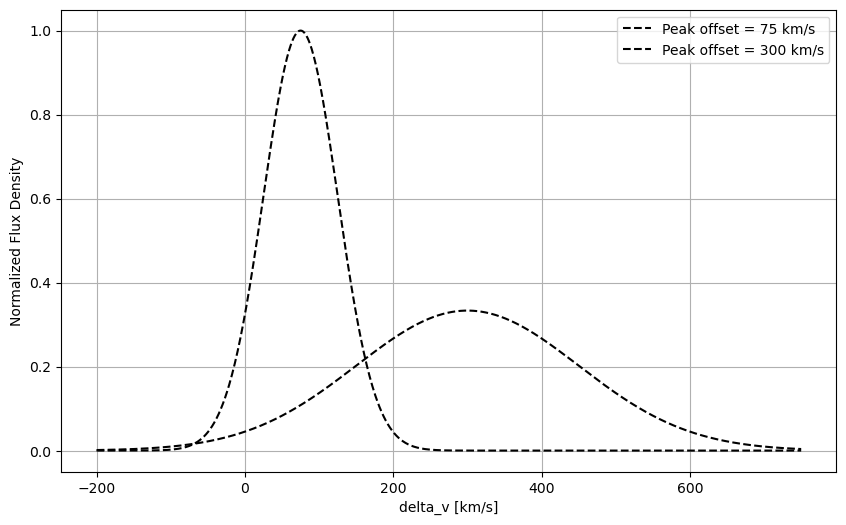

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def intrinsic_lya_lineshape(velocity, delta_v, sigma_alpha):
    lineshape = (1 / (np.sqrt(2 * np.pi) * sigma_alpha)) * np.exp(-0.5 * ((velocity - delta_v) / sigma_alpha)**2)
    return lineshape



if __name__ == "__main__":
   
    sigma_alpha1 = 50
    sigma_alpha2 = 150
    velocity = np.linspace(-200, 750, 1000)

   
    delta_v1 = 75  #First offset
    delta_v2 = 300  # Second offset

    # Two line shapes
    lineshape1 = intrinsic_lya_lineshape(velocity, delta_v1, sigma_alpha1)
    lineshape2 = intrinsic_lya_lineshape(velocity, delta_v2, sigma_alpha2)

    #Plotting the ressult
    plt.figure(figsize=(10, 6))
    plt.plot(velocity, lineshape1_normalized, 'k--', label=f"Peak offset = {delta_v1} km/s")
    plt.plot(velocity, lineshape2_normalized, 'k--', label=f"Peak offset = {delta_v2} km/s")
    plt.xlabel("delta_v [km/s]")
    plt.ylabel("Normalized Flux Density") #actually haven't normalized yet
    plt.legend()
    plt.grid()
    plt.show()
